# Plot the abundance of the core species. 
Core species being species present in 99% or more of the metagenomes. 
Used Coltons gather tables plugin to make a pres/abs df, then summed the row (each row being a spp). Only kept spp >=99% metaGs. 
Then subset the lines in the gather files with these species from the gather files. Bc large files


Use parquet next time

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df_meta = pd.read_csv('../data/SRA_meta.3216.csv')
df_meta = df_meta[['acc', 'mbases']]

In [16]:
import pandas as pd
df2 = pd.read_csv('../data/251104_corespp.pangdb.gather.csv', low_memory=False)
len(df2)

67530

In [17]:
df2['name'] = df2['name'].str.extract(r'(s__.*)$')
df2['name'] = df2['name'].str.replace('^s__', '', regex=True)


In [18]:
counts = df2['name'].value_counts()


In [19]:
core_species = counts[counts > 3100].index.tolist()
len(core_species)

21

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # assuming df is your dataframe
# species = "Sodaliphilus sp004557565"

# df_sub = df2[df2["name"] == species]

# plt.figure(figsize=(6,4))
# plt.scatter(df_sub["median_abund"], df_sub["intersect_bp"], s=30, color="steelblue", edgecolor="k")
# plt.xlabel("Median abundance")
# plt.ylabel("Intersect bp")
# plt.title(species)
# plt.xlim(0, 20)

# plt.tight_layout()
# plt.show()


In [20]:
df_mbases = pd.merge(df_meta, df2, left_on='acc', right_on='query_name', how='inner')

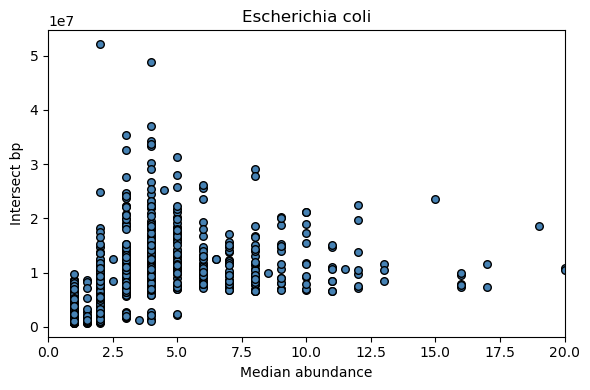

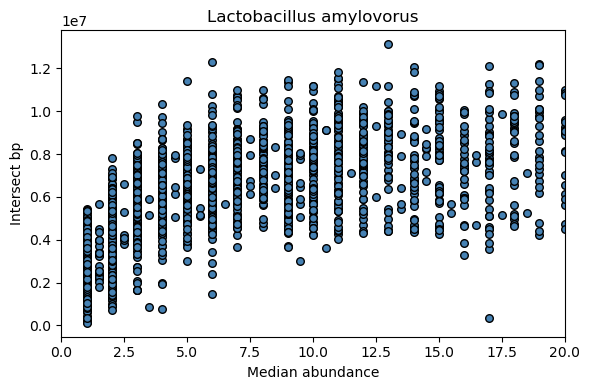

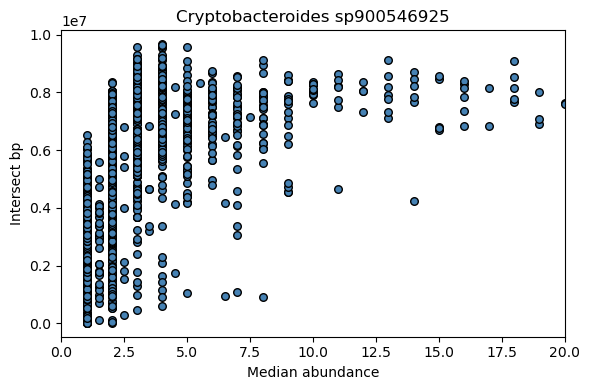

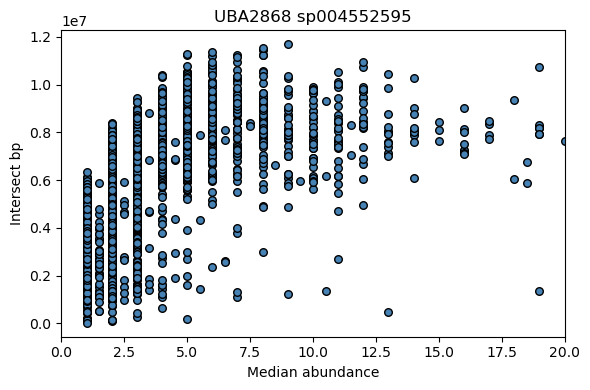

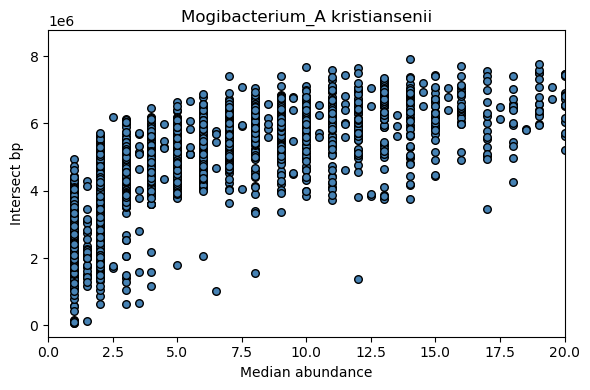

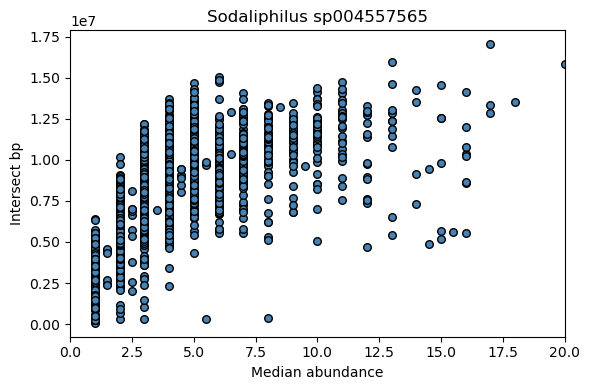

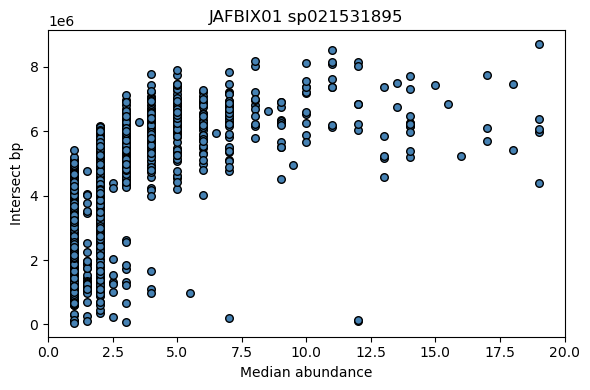

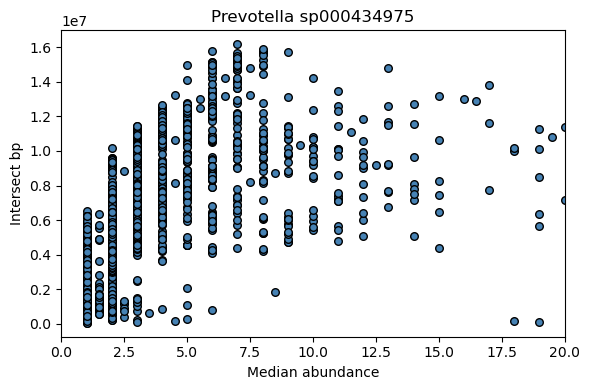

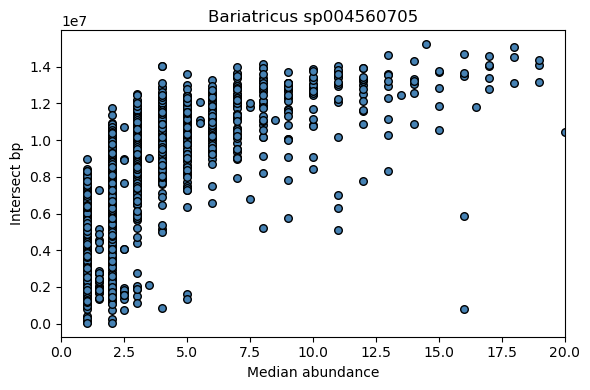

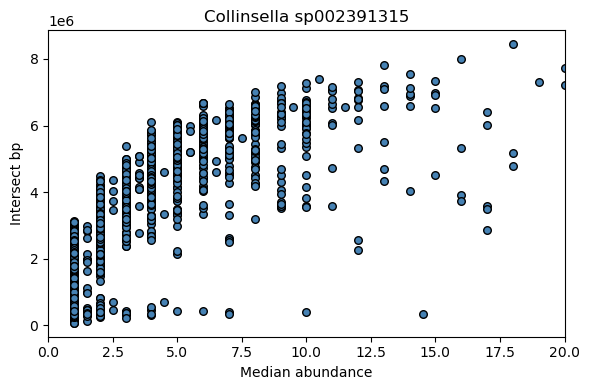

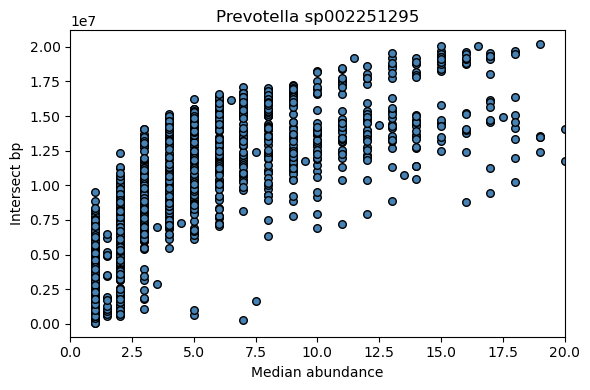

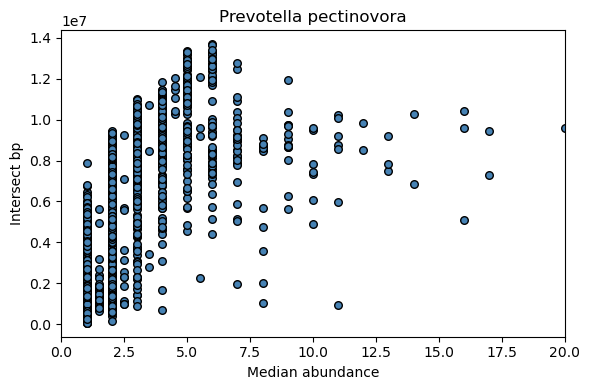

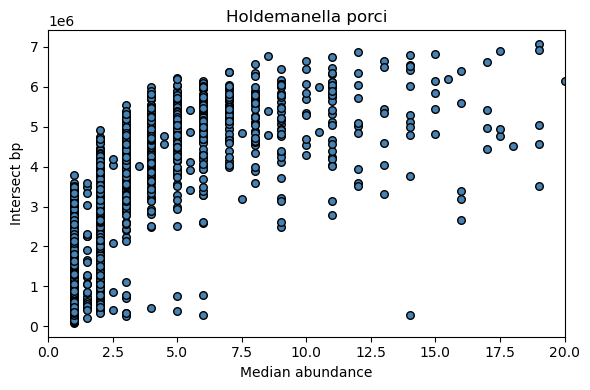

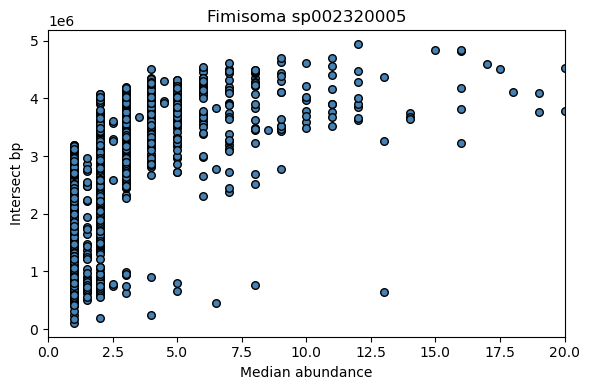

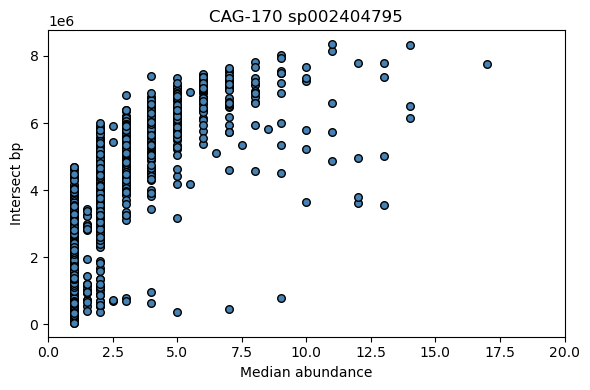

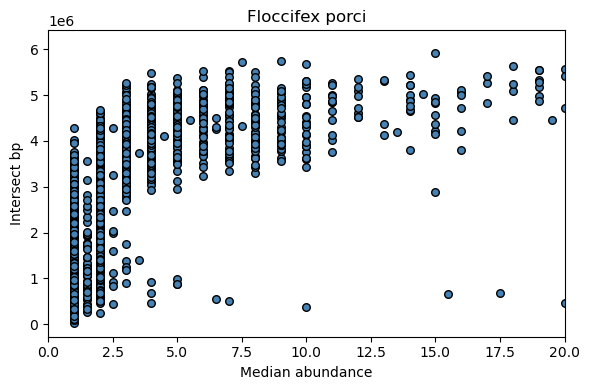

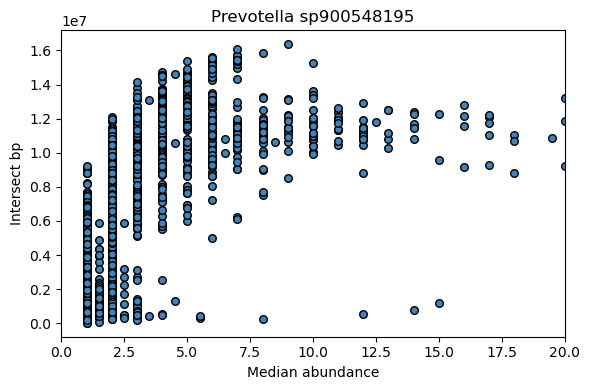

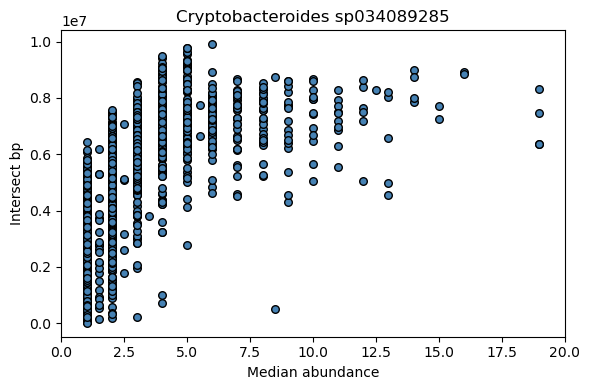

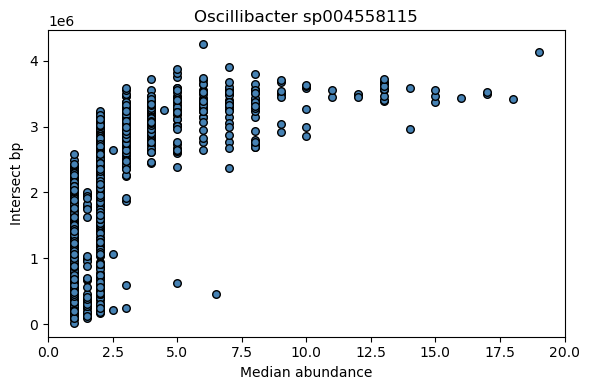

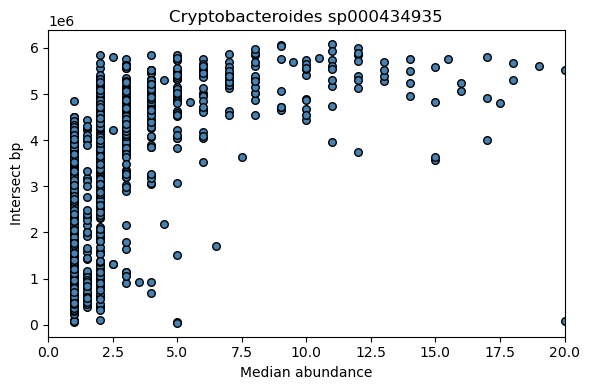

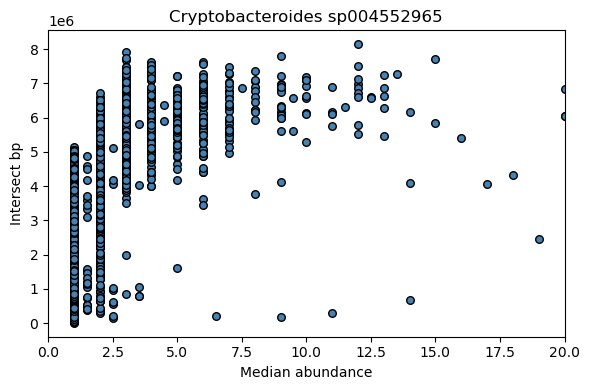

In [21]:
for name in core_species:
    sub = df2[df2["name"] == name]
    plt.figure(figsize=(6,4))
    plt.scatter(sub["median_abund"], sub["intersect_bp"], s=30, color="steelblue", edgecolor="k")
    plt.xlabel("Median abundance")
    plt.ylabel("Intersect bp")
    plt.title(name)
    plt.xlim(0, 20)
    plt.tight_layout()
    plt.show()


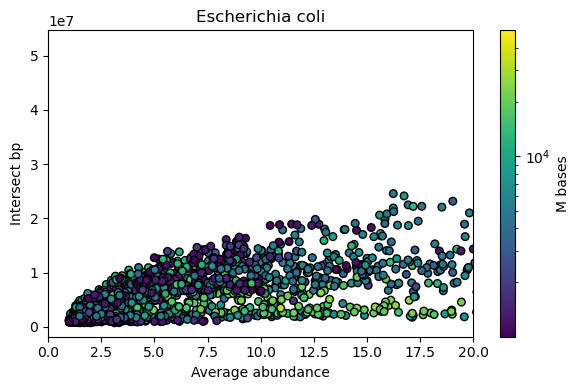

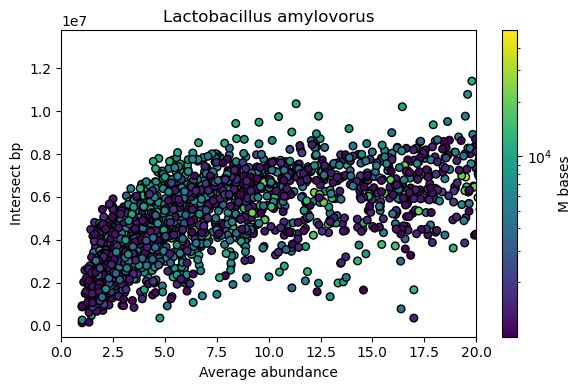

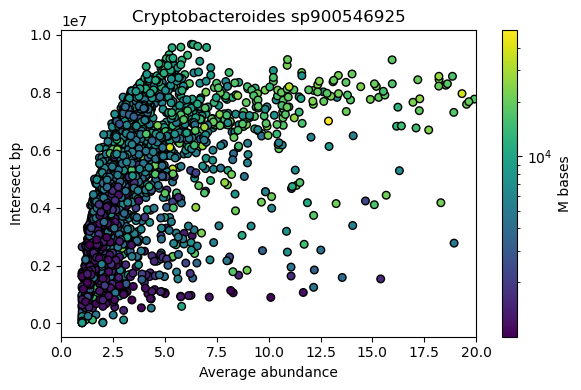

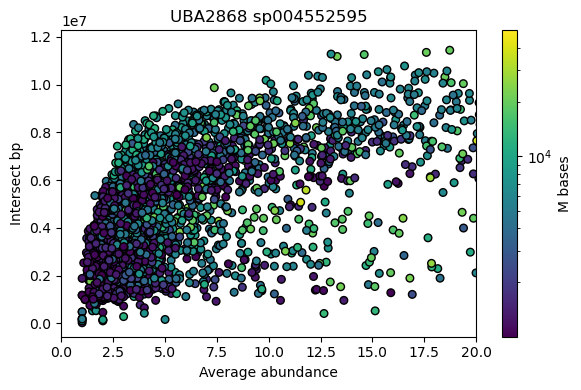

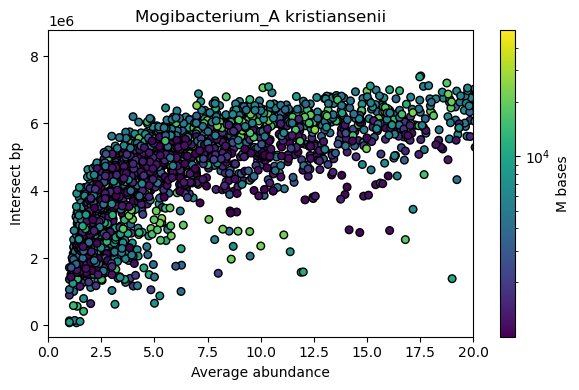

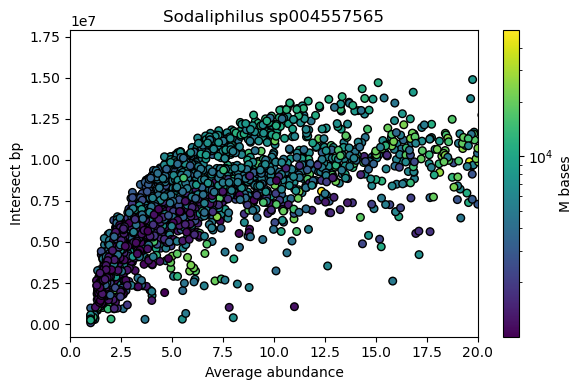

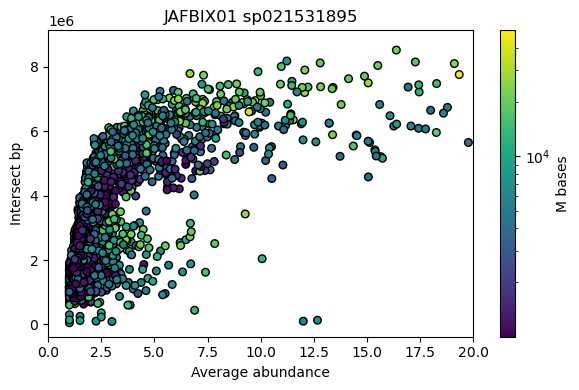

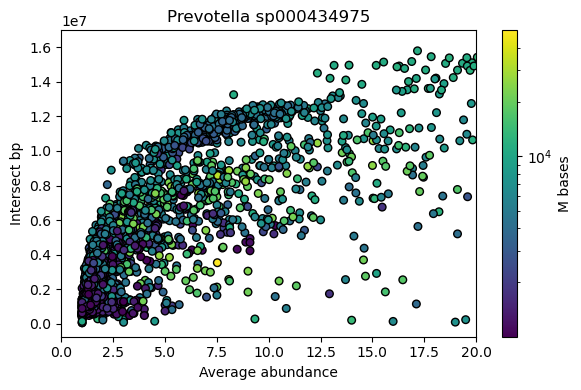

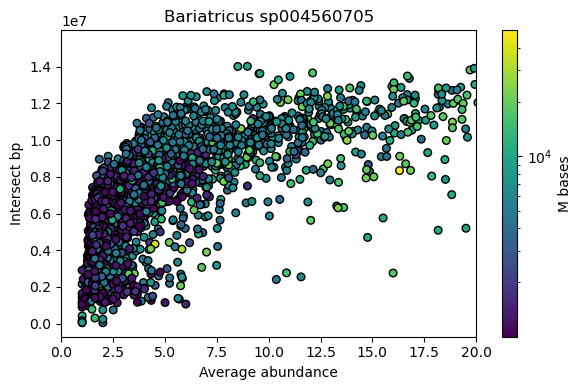

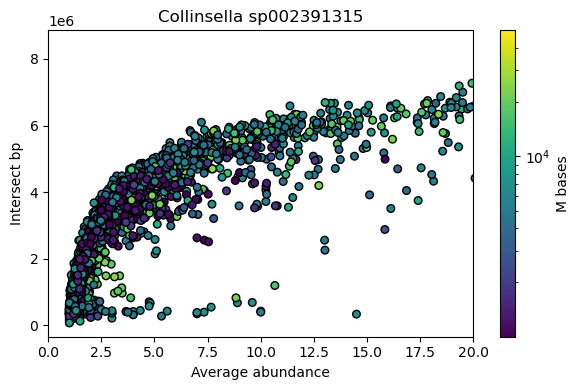

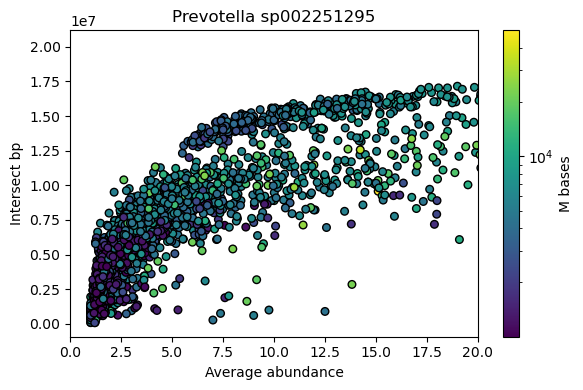

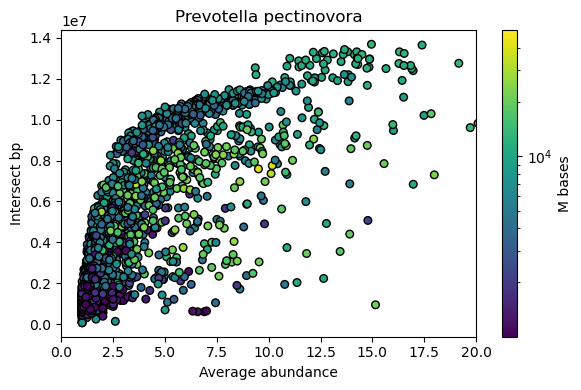

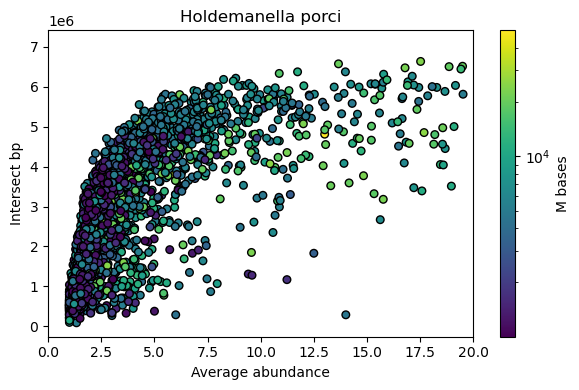

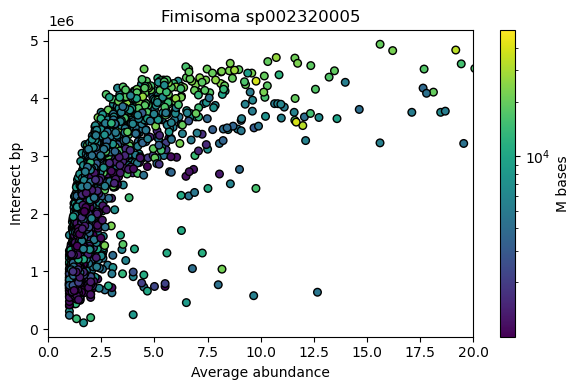

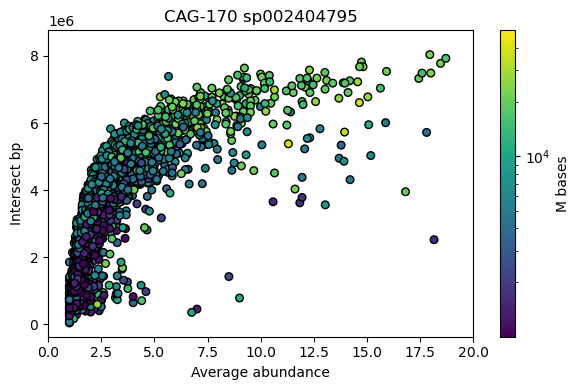

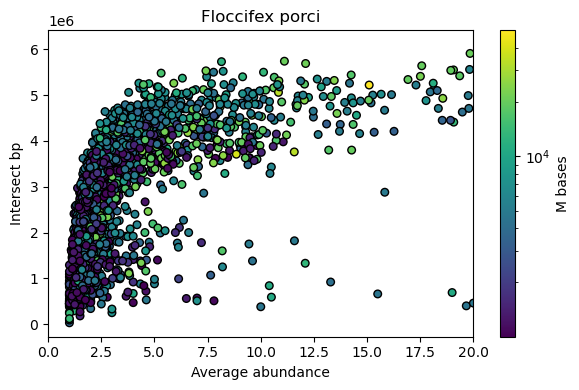

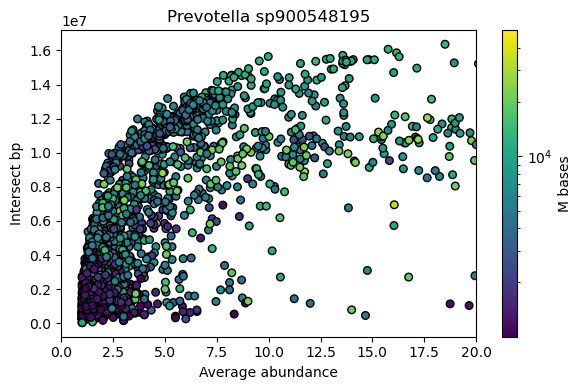

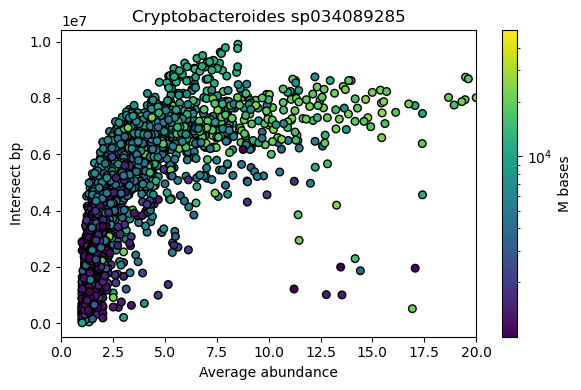

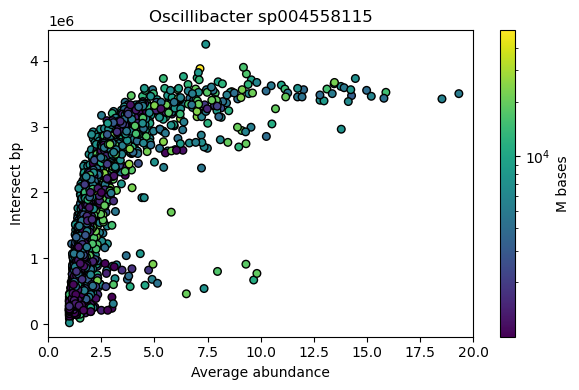

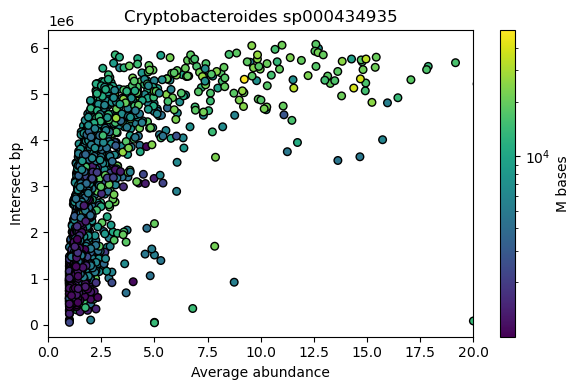

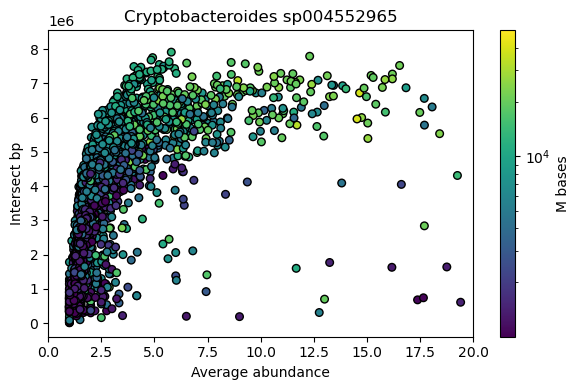

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
for name in core_species:
    sub = df_mbases[df_mbases["name"] == name]

    plt.figure(figsize=(6,4))
    sc = plt.scatter(
        sub["average_abund"],
        sub["intersect_bp"],
        c=sub["mbases"],             # color by mbases
        cmap="viridis",
        norm=LogNorm(),
        s=30,
        edgecolor="k"
    )
    plt.xlabel("Average abundance")
    plt.ylabel("Intersect bp")
    plt.title(name)
    plt.xlim(0, 20)
    plt.colorbar(sc, label="M bases")  # add colorbar
    plt.tight_layout()
    plt.show()
